In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
astro = pd.read_csv("star_classification.csv")

In [3]:
astro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [4]:
astro.head(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [5]:
astro["class"].nunique()

3

In [6]:
astro["class"].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [7]:
astro.nunique()

obj_ID          78053
alpha           99999
delta           99999
u               93748
g               92651
r               91901
i               92019
z               92007
run_ID            430
rerun_ID            1
cam_col             6
field_ID          856
spec_obj_ID    100000
class               3
redshift        99295
plate            6284
MJD              2180
fiber_ID         1000
dtype: int64

In [8]:
astro.drop(["obj_ID", "run_ID", "rerun_ID", "cam_col", "field_ID", "spec_obj_ID", "MJD"], axis = 1, inplace = True) 

In [9]:
astro.head(4)

,alpha,delta,u,g,r,i,z,class,redshift,plate,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794,5812,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136,10445,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195,4576,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346,9149,775


In [10]:
#Lets first do an exploratory analysis with the data, for that we are going to split the data set in 3, one for each category
astro["class"] = astro["class"].astype("category")
galaxy = astro["class"] == "GALAXY"
df_galaxy = astro[galaxy]

In [11]:
df_galaxy

,alpha,delta,u,g,r,i,z,class,redshift,plate,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794,5812,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136,10445,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195,4576,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346,9149,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123,6121,842
...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,GALAXY,0.000000,9374,438
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,GALAXY,0.404895,7626,866
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,GALAXY,0.143366,2764,74
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,GALAXY,0.455040,6751,470


In [12]:
star = astro["class"] == "STAR"
df_star = astro[star]
df_star

,alpha,delta,u,g,r,i,z,class,redshift,plate,fiber_ID
9,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,STAR,-0.000008,2444,232
12,345.801874,32.672868,23.17274,20.14496,19.41948,19.22034,18.89359,STAR,0.000072,6504,574
16,353.201522,3.080796,24.54890,21.44267,20.95315,20.79360,20.48442,STAR,-0.000429,4283,178
18,14.383135,3.214326,21.82154,20.55730,19.94918,19.76057,19.55514,STAR,-0.000440,8753,258
21,144.785293,46.826496,24.54793,22.33601,20.92259,19.87177,19.16934,STAR,-0.000120,7316,756
...,...,...,...,...,...,...,...,...,...,...,...
99931,338.557124,24.678940,26.03642,23.55800,21.91035,20.74742,19.72344,STAR,-0.000070,7653,613
99939,355.651889,27.734322,24.87293,20.71855,19.83588,19.54439,19.43266,STAR,-0.000778,6516,706
99941,251.031744,31.840055,23.25934,22.93305,21.72368,20.44625,19.73752,STAR,-0.000153,10920,833
99955,172.281648,-8.909060,22.26657,20.76710,20.22759,20.08172,19.98396,STAR,-0.000395,2876,98


In [13]:
quasar = astro["class"] == "QSO"
df_quasar = astro[quasar]
df_quasar

,alpha,delta,u,g,r,i,z,class,redshift,plate,fiber_ID
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,QSO,1.424659,5026,741
6,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,QSO,0.586455,11069,113
17,1.494389,3.291746,20.38562,20.40514,20.29996,20.05918,19.89044,QSO,2.031528,8743,295
23,145.883006,47.300484,21.73992,21.53095,21.26763,21.36257,21.15861,QSO,2.075680,7308,596
33,20.052556,11.497881,21.89214,21.35124,21.18755,20.84300,20.76580,QSO,1.528308,11074,306
...,...,...,...,...,...,...,...,...,...,...,...
99961,134.347759,47.771911,24.17897,22.89025,21.26451,20.94941,19.87500,QSO,0.219966,7513,339
99966,222.761686,32.203212,20.23421,19.76480,19.46940,19.36135,19.21768,QSO,0.398574,3869,112
99968,259.504325,31.462416,24.86685,23.22772,21.82982,21.80359,21.56733,QSO,1.239638,11654,812
99977,217.958430,52.316738,24.15617,22.05986,21.80826,21.95129,21.24179,QSO,1.067543,7031,58


In [14]:
#The idea behind dividing the dataset for each category is to better understand each feature and them compare them among the 3 categories
df_galaxy.describe()

,alpha,delta,u,g,r,i,z,redshift,plate,fiber_ID
count,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000
mean,177.954727,23.513911,22.587379,20.906101,19.587552,18.851990,18.449156,0.421596,4869.375608,450.645858
std,94.403760,19.315205,2.264355,2.107755,1.874133,1.689809,1.656302,0.264858,2858.332435,272.901259
min,0.005528,-12.364701,13.897990,12.679020,11.746640,11.299560,10.897380,-0.009971,266.000000,1.000000
25%,131.506951,5.167016,20.794760,18.912680,17.817150,17.379670,17.095670,0.164527,2172.000000,221.000000
50%,181.315787,22.301731,22.841770,21.582200,20.104590,19.223660,18.766630,0.456274,4770.000000,433.000000
75%,231.333266,37.972697,24.207410,22.445130,20.974610,19.947090,19.472260,0.594699,6792.000000,649.000000
max,359.994125,77.615588,29.325650,31.602240,29.571860,30.163590,29.383740,1.995524,12547.000000,1000.000000


In [15]:
df_star.describe()

,alpha,delta,u,g,r,i,z,redshift,plate,fiber_ID
count,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000,21594.000000
mean,174.234485,23.498554,20.689805,19.153188,18.946969,18.543736,17.870400,-0.000115,4287.920348,410.120033
std,99.876175,20.383288,68.228825,68.210460,1.972786,1.841714,68.193708,0.000465,2691.789973,255.385284
min,0.029838,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.004136,267.000000,1.000000
25%,114.863064,3.127855,19.327275,18.034847,17.454012,17.139703,16.963810,-0.000295,2318.000000,201.000000
50%,174.151671,23.400565,21.010555,19.542825,18.955080,18.592360,18.319225,-0.000076,3296.000000,394.000000
75%,240.850550,39.939705,22.960617,21.228690,20.557477,20.041690,19.729615,0.000075,6386.000000,582.000000
max,359.999810,83.000519,30.660390,30.607000,29.374110,30.250090,26.427790,0.004153,12547.000000,1000.000000


In [16]:
df_quasar.describe()

,alpha,delta,u,g,r,i,z,redshift,plate,fiber_ID
count,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000,18961.000000
mean,180.474314,26.808621,21.547619,20.926193,20.624089,20.431173,20.266732,1.719676,6943.071621,489.768419
std,98.962348,19.588410,1.495879,1.163239,1.084237,1.080135,1.095076,0.913954,2792.093167,283.673805
min,0.010959,-15.980904,10.996230,13.662170,12.357630,12.637440,11.302470,0.000461,267.000000,1.000000
25%,129.133119,7.427090,20.637640,20.249730,20.006330,19.811070,19.644250,1.106605,5005.000000,250.000000
50%,183.682504,29.299167,21.503240,21.056290,20.772720,20.582110,20.373970,1.617232,7574.000000,486.000000
75%,235.864774,42.886953,22.286470,21.687770,21.413450,21.202280,21.001230,2.220279,8746.000000,730.000000
max,359.999615,82.288657,32.781390,27.894820,27.397090,32.141470,28.790550,7.011245,12547.000000,1000.000000


In [17]:
#Now lets plot a bar graph for each feature comparing the 3 classes, we are going to work with the average value of each feature
alpha_galaxy = round(df_galaxy["alpha"].mean(), 2)
alpha_star = round(df_star["alpha"].mean(), 2)
alpha_quasar = round(df_quasar["alpha"].mean(), 2)
average_alpha = [alpha_galaxy, alpha_star, alpha_quasar]
names = ["galaxy", "star", "quasar"]

Text(0.5, 0, 'Class')

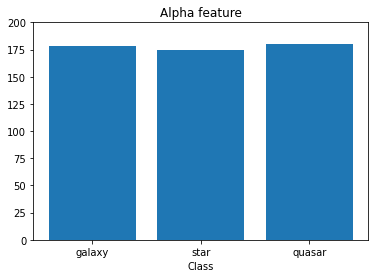

In [18]:
plt.bar(names, average_alpha) 
plt.ylim(0, 200)
plt.title("Alpha feature")
plt.xlabel("Class")

In [19]:
# We can see that the average alpha feature are very close among the 3 class

In [20]:
delta_galaxy = round(df_galaxy["delta"].mean(), 2)
delta_star = round(df_star["delta"].mean(), 2)
delta_quasar = round(df_quasar["delta"].mean(), 2)
average_delta = [delta_galaxy, delta_star, delta_quasar]

Text(0.5, 0, 'Class')

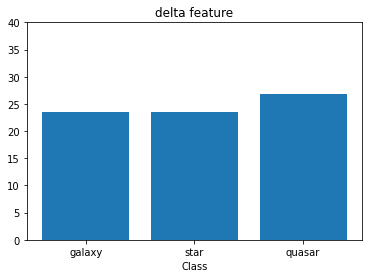

In [21]:
plt.bar(names, average_delta) 
plt.ylim(0, 40)
plt.title("delta feature")
plt.xlabel("Class")

In [22]:
#The delta feature are almos equal for the galaxy and star, but a little higher for the quasar

In [23]:
u_galaxy = round(df_galaxy["u"].mean(), 2)
u_star = round(df_star["u"].mean(), 2)
u_quasar = round(df_quasar["u"].mean(), 2)
average_u = [u_galaxy, u_star, u_quasar]

Text(0.5, 0, 'Class')

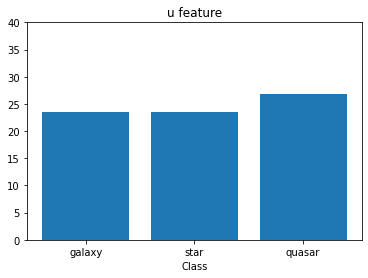

In [24]:
plt.bar(names, average_delta) 
plt.ylim(0, 40)
plt.title("u feature")
plt.xlabel("Class")

Text(0.5, 0, 'Class')

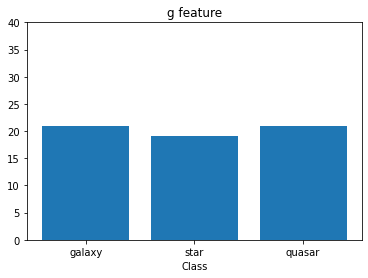

In [25]:
g_galaxy = round(df_galaxy["g"].mean(), 2)
g_star = round(df_star["g"].mean(), 2)
g_quasar = round(df_quasar["g"].mean(), 2)
average_g = [g_galaxy, g_star, g_quasar]
plt.bar(names, average_g)
plt.ylim(0, 40)
plt.title("g feature")
plt.xlabel("Class")

Text(0.5, 0, 'Class')

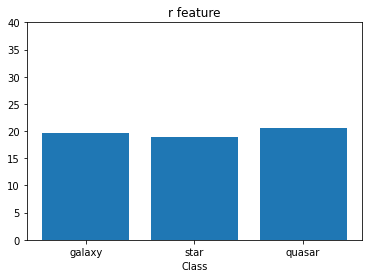

In [26]:
r_galaxy = round(df_galaxy["r"].mean(), 2)
r_star = round(df_star["r"].mean(), 2)
r_quasar = round(df_quasar["r"].mean(), 2)
average_r = [r_galaxy, r_star, r_quasar]
plt.bar(names, average_r)
plt.ylim(0, 40)
plt.title("r feature")
plt.xlabel("Class")

Text(0.5, 0, 'Class')

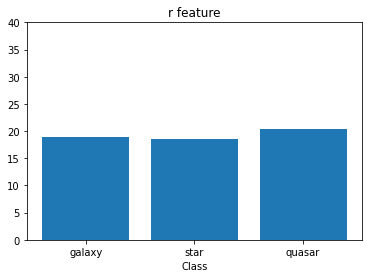

In [27]:
i_galaxy = round(df_galaxy["i"].mean(), 2)
i_star = round(df_star["i"].mean(), 2)
i_quasar = round(df_quasar["i"].mean(), 2)
average_i = [i_galaxy, i_star, i_quasar]
plt.bar(names, average_i)
plt.ylim(0, 40)
plt.title("r feature")
plt.xlabel("Class")

Text(0.5, 0, 'Class')

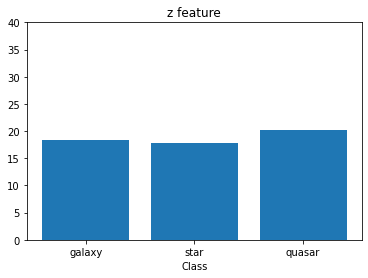

In [28]:
z_galaxy = round(df_galaxy["z"].mean(), 2)
z_star = round(df_star["z"].mean(), 2)
z_quasar = round(df_quasar["z"].mean(), 2)
average_z = [z_galaxy, z_star, z_quasar]
plt.bar(names, average_z)
plt.ylim(0, 40)
plt.title("z feature")
plt.xlabel("Class")

Text(0.5, 0, 'Class')

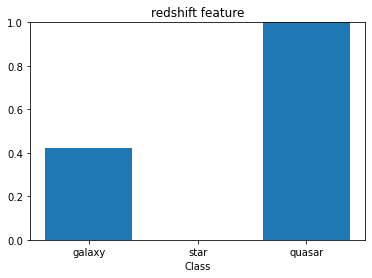

In [29]:
redshift_galaxy = round(df_galaxy["redshift"].mean(), 2)
redshift_star = round(df_star["redshift"].mean(), 2)
redshift_quasar = round(df_quasar["redshift"].mean(), 2)
average_redshift = [redshift_galaxy, redshift_star, redshift_quasar]
plt.bar(names, average_redshift)
plt.ylim(0, 1)
plt.title("redshift feature")
plt.xlabel("Class")

In [30]:
#The redshit of the star is negative

In [31]:
#preparing the model

In [32]:
x_features = astro.drop("class", axis = 1)

In [33]:
x_features

,alpha,delta,u,g,r,i,z,redshift,plate,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121,842
...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,9374,438
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,7626,866
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,2764,74
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,6751,470


In [34]:
y_target = astro["class"]

In [35]:
y_target

0        GALAXY
1        GALAXY
2        GALAXY
3        GALAXY
4        GALAXY
          ...  
99995    GALAXY
99996    GALAXY
99997    GALAXY
99998    GALAXY
99999    GALAXY
Name: class, Length: 100000, dtype: category
Categories (3, object): ['GALAXY', 'QSO', 'STAR']

In [36]:
#We can use MinMaxScaler to adjust our features values to the range of (0,1)

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [38]:
scaler.fit(x_features)

MinMaxScaler()

In [39]:
x_features_Scaled = scaler.transform(x_features)

In [40]:
x_features_Scaled

array([[0.37690482, 0.50380246, 0.99911256, ..., 0.09183086, 0.45159189,
        0.17017017],
       [0.40228576, 0.49181212, 0.99920216, ..., 0.11238889, 0.8288413 ,
        0.42642643],
       [0.39495978, 0.53413882, 0.99925055, ..., 0.09316979, 0.35094862,
        0.2982983 ],
       ...,
       [0.62384846, 0.33880973, 0.99884246, ..., 0.02183899, 0.20340363,
        0.07307307],
       [0.58962907, 0.6429744 , 0.99925925, ..., 0.06622931, 0.52805146,
        0.46946947],
       [0.54692681, 0.67052516, 0.99898725, ..., 0.07874916, 0.58171159,
        0.85085085]])

In [41]:
# Lets use LabelEncoder to change all the values from our target to numerical values (0, 1, 2)

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
labelencoder = LabelEncoder()

In [44]:
y_target = labelencoder.fit_transform(y_target)
y_targetts = pd.DataFrame(y_target, columns = ["Class"])
y_targetts.nunique()

Class    3
dtype: int64

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [46]:
#Lets split the test in 80% train and 20% test

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_features_Scaled, y_target, test_size=0.2)

In [48]:
#Training the model

In [49]:
model = LogisticRegression(max_iter=100000, multi_class= "multinomial" )
model.fit(x_train, y_train)

LogisticRegression(max_iter=100000, multi_class='multinomial')

In [50]:
#Checking the accuracy

In [51]:
predictions = model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.93025

In [52]:
# We got an accuracy of 93%, which is a very good number!